<a href="https://colab.research.google.com/github/janhavi-lab/GreenTechi/blob/main/Electricity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [21]:
df = pd.read_csv('/content/unsupervised_dataset.csv')

In [22]:
X = df.drop('Wastage_Label', axis=1)
y = df['Wastage_Label']
display(X.head())
display(y.head())

KeyError: "['Wastage_Label'] not found in axis"

In [4]:
display(df.head())
display(df.info())
display(df.describe())

,RoomNo,Month,Day,Hour,Consumption_kWh,AverageConsumption_kWh,Wastage_kWh,Wastage_Label
0,1,8,1,0,0.882,0.342,0.54,Medium Wastage Room
1,1,8,1,1,0.137,0.423,0.00,Green Room
2,1,8,1,2,0.106,0.244,0.00,Green Room
3,1,8,1,3,0.110,0.373,0.00,Green Room
4,1,8,1,4,0.090,0.585,0.00,Green Room


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RoomNo                  2520 non-null   int64  
 1   Month                   2520 non-null   int64  
 2   Day                     2520 non-null   int64  
 3   Hour                    2520 non-null   int64  
 4   Consumption_kWh         2520 non-null   float64
 5   AverageConsumption_kWh  2520 non-null   float64
 6   Wastage_kWh             2520 non-null   float64
 7   Wastage_Label           2520 non-null   object 
dtypes: float64(3), int64(4), object(1)
memory usage: 157.6+ KB


None

,RoomNo,Month,Day,Hour,Consumption_kWh,AverageConsumption_kWh,Wastage_kWh
count,2520.000000,2520.0,2520.000000,2520.00000,2520.000000,2520.000000,2520.000000
mean,8.000000,8.0,4.000000,11.50000,0.484710,0.404694,0.234438
std,4.321351,0.0,2.000397,6.92356,0.478364,0.114243,0.377046
min,1.000000,8.0,1.000000,0.00000,0.051000,0.200000,0.000000
25%,4.000000,8.0,2.000000,5.75000,0.133000,0.307000,0.000000
50%,8.000000,8.0,4.000000,11.50000,0.218000,0.408000,0.000000
75%,12.000000,8.0,6.000000,17.25000,0.824750,0.502000,0.416000
max,15.000000,8.0,7.000000,23.00000,1.713000,0.600000,1.481000


In [5]:
df.isnull().sum()

,0
RoomNo,0
Month,0
Day,0
Hour,0
Consumption_kWh,0
AverageConsumption_kWh,0
Wastage_kWh,0
Wastage_Label,0


In [6]:
df.drop_duplicates()

,RoomNo,Month,Day,Hour,Consumption_kWh,AverageConsumption_kWh,Wastage_kWh,Wastage_Label
0,1,8,1,0,0.882,0.342,0.540,Medium Wastage Room
1,1,8,1,1,0.137,0.423,0.000,Green Room
2,1,8,1,2,0.106,0.244,0.000,Green Room
3,1,8,1,3,0.110,0.373,0.000,Green Room
4,1,8,1,4,0.090,0.585,0.000,Green Room
...,...,...,...,...,...,...,...,...
2515,15,8,7,19,0.051,0.572,0.000,Green Room
2516,15,8,7,20,1.430,0.497,0.933,High Wastage Room
2517,15,8,7,21,1.562,0.203,1.359,High Wastage Room
2518,15,8,7,22,0.058,0.412,0.000,Green Room


In [7]:
X

,RoomNo,Month,Day,Hour,Consumption_kWh,AverageConsumption_kWh,Wastage_kWh
0,1,8,1,0,0.882,0.342,0.540
1,1,8,1,1,0.137,0.423,0.000
2,1,8,1,2,0.106,0.244,0.000
3,1,8,1,3,0.110,0.373,0.000
4,1,8,1,4,0.090,0.585,0.000
...,...,...,...,...,...,...,...
2515,15,8,7,19,0.051,0.572,0.000
2516,15,8,7,20,1.430,0.497,0.933
2517,15,8,7,21,1.562,0.203,1.359
2518,15,8,7,22,0.058,0.412,0.000


In [8]:
y

,Wastage_Label
0,Medium Wastage Room
1,Green Room
2,Green Room
3,Green Room
4,Green Room
...,...
2515,Green Room
2516,High Wastage Room
2517,High Wastage Room
2518,Green Room


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2016, 7)
X_test shape: (504, 7)
y_train shape: (2016,)
y_test shape: (504,)


In [11]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

model = LinearRegression()
model.fit(X_train, y_train_encoded)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean squared error (MSE):', mean_squared_error(y_test_encoded, y_pred))
print('Coefficient of determination (R^2):', r2_score(y_test_encoded, y_pred))

Mean squared error (MSE): 0.252679502429122
Coefficient of determination (R^2): 0.5635093780285496


# Task
Compare the performance of Logistic Regression, Decision Tree, and Random Forest classification models on the provided dataset and identify the best-performing model.

## Import necessary libraries

### Subtask:
Import the required classification models and evaluation metrics from scikit-learn.


**Reasoning**:
Import the required classification models and evaluation metrics for the subtask.



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Train and evaluate logistic regression

### Subtask:
Train a Logistic Regression model on the training data and evaluate its performance on the test data using metrics like accuracy, precision, recall, and F1-score.


**Reasoning**:
Train a Logistic Regression model and evaluate its performance.



In [16]:
logistic_regression_model = LogisticRegression(random_state=42, solver='liblinear')
logistic_regression_model.fit(X_train, y_train_encoded)
y_pred_lr = logistic_regression_model.predict(X_test)

accuracy_lr = accuracy_score(y_test_encoded, y_pred_lr)
precision_lr = precision_score(y_test_encoded, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test_encoded, y_pred_lr, average='weighted')
f1_lr = f1_score(y_test_encoded, y_pred_lr, average='weighted')

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Logistic Regression Precision: {precision_lr}")
print(f"Logistic Regression Recall: {recall_lr}")
print(f"Logistic Regression F1-score: {f1_lr}")

Logistic Regression Accuracy: 0.9444444444444444
Logistic Regression Precision: 0.9485448025363992
Logistic Regression Recall: 0.9444444444444444
Logistic Regression F1-score: 0.9398811295713088


## Train and evaluate decision tree

### Subtask:
Train a Decision Tree model on the training data and evaluate its performance on the test data using the same classification metrics.


**Reasoning**:
Train a Decision Tree model and evaluate its performance on the test data.



In [17]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train_encoded)
y_pred_dt = decision_tree_model.predict(X_test)

accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
precision_dt = precision_score(y_test_encoded, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test_encoded, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test_encoded, y_pred_dt, average='weighted')

print(f"Decision Tree Accuracy: {accuracy_dt}")
print(f"Decision Tree Precision: {precision_dt}")
print(f"Decision Tree Recall: {recall_dt}")
print(f"Decision Tree F1-score: {f1_dt}")

Decision Tree Accuracy: 1.0
Decision Tree Precision: 1.0
Decision Tree Recall: 1.0
Decision Tree F1-score: 1.0


## Train and evaluate random forest

### Subtask:
Train a Random Forest model on the training data and evaluate its performance on the test data using the same classification metrics.


**Reasoning**:
Train a Random Forest model and evaluate its performance on the test data using the specified metrics.



In [18]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train_encoded)
y_pred_rf = random_forest_model.predict(X_test)

accuracy_rf = accuracy_score(y_test_encoded, y_pred_rf)
precision_rf = precision_score(y_test_encoded, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test_encoded, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test_encoded, y_pred_rf, average='weighted')

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest F1-score: {f1_rf}")

Random Forest Accuracy: 0.998015873015873
Random Forest Precision: 0.9980419799498746
Random Forest Recall: 0.998015873015873
Random Forest F1-score: 0.9980164304667616


## Compare model performance

### Subtask:
Summarize and compare the evaluation metrics of the three models to determine which one performed best.


**Reasoning**:
Print the evaluation metrics for each model and then create a summary table to compare their performance.



In [20]:
print("--- Model Performance Comparison ---")
print("\nLogistic Regression:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}")

print("\nDecision Tree:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")

print("\nRandom Forest:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")

# Create a summary table
performance_summary = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
    'Logistic Regression': [accuracy_lr, precision_lr, recall_lr, f1_lr],
    'Decision Tree': [accuracy_dt, precision_dt, recall_dt, f1_dt],
    'Random Forest': [accuracy_rf, precision_rf, recall_rf, f1_rf]
})

print("\n--- Performance Summary Table ---")
display(performance_summary)

best_model = performance_summary.set_index('Metric').idxmax(axis=1)
print("\n--- Best Performing Model per Metric ---")
display(best_model)

# Overall best model based on average F1-score (or another chosen metric)
overall_best_model = performance_summary.set_index('Metric').loc['F1-score'].idxmax()
print(f"\nOverall best model based on F1-score: {overall_best_model}")

--- Model Performance Comparison ---

Logistic Regression:
Accuracy: 0.9444
Precision: 0.9485
Recall: 0.9444
F1-score: 0.9399

Decision Tree:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000

Random Forest:
Accuracy: 0.9980
Precision: 0.9980
Recall: 0.9980
F1-score: 0.9980

--- Performance Summary Table ---


,Metric,Logistic Regression,Decision Tree,Random Forest
0,Accuracy,0.944444,1.0,0.998016
1,Precision,0.948545,1.0,0.998042
2,Recall,0.944444,1.0,0.998016
3,F1-score,0.939881,1.0,0.998016



--- Best Performing Model per Metric ---


,0
Metric,
Accuracy,Decision Tree
Precision,Decision Tree
Recall,Decision Tree
F1-score,Decision Tree



Overall best model based on F1-score: Decision Tree


## Summary:

### Data Analysis Key Findings

*   The Logistic Regression model achieved an accuracy of approximately 0.9444, precision of 0.9485, recall of 0.9444, and an F1-score of 0.9399 on the test data.
*   The Decision Tree model demonstrated perfect performance on the test set with an accuracy, precision, recall, and F1-score of 1.0.
*   The Random Forest model also performed exceptionally well, with accuracy, precision, recall, and F1-score all approximately 0.998.
*   Based on the evaluation metrics (Accuracy, Precision, Recall, and F1-score), the Decision Tree model was the best-performing model in this comparison, achieving a perfect score across all metrics.

### Insights or Next Steps

*   The perfect scores achieved by the Decision Tree and near-perfect scores by the Random Forest on the test set might indicate potential overfitting or a very separable dataset. Further investigation using cross-validation or a larger, independent test set could provide a more robust evaluation.
*   Given the high performance of both tree-based models, exploring hyperparameter tuning for the Decision Tree and Random Forest models could potentially improve their generalization ability and confirm their performance on unseen data.


## Data Collection and Understanding

### Subtask:
Display the first few rows, information, and summary statistics of the dataset to understand its structure and content.

**Reasoning**:
Display the head, info, and description of the dataframe to understand its structure, data types, and summary statistics.

In [23]:
display(df.head())
display(df.info())
display(df.describe())

,Room,Month,Day,Hour,MorningFlag,AfternoonFlag,EveningFlag,NightFlag,Consumption_kWh,AverageConsumption_kWh
0,1,1,1,0,0,0,0,1,0.051,0.286417
1,1,1,1,1,0,0,0,1,0.184,0.286417
2,1,1,1,2,0,0,0,1,0.212,0.286417
3,1,1,1,3,0,0,0,1,0.215,0.286417
4,1,1,1,4,0,0,0,1,0.180,0.286417


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Room                    2520 non-null   int64  
 1   Month                   2520 non-null   int64  
 2   Day                     2520 non-null   int64  
 3   Hour                    2520 non-null   int64  
 4   MorningFlag             2520 non-null   int64  
 5   AfternoonFlag           2520 non-null   int64  
 6   EveningFlag             2520 non-null   int64  
 7   NightFlag               2520 non-null   int64  
 8   Consumption_kWh         2520 non-null   float64
 9   AverageConsumption_kWh  2520 non-null   float64
dtypes: float64(2), int64(8)
memory usage: 197.0 KB


None

,Room,Month,Day,Hour,MorningFlag,AfternoonFlag,EveningFlag,NightFlag,Consumption_kWh,AverageConsumption_kWh
count,2520.000000,2520.0,2520.000000,2520.00000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000,2520.000000
mean,8.000000,1.0,4.000000,11.50000,0.250000,0.250000,0.166667,0.333333,0.266898,0.266898
std,4.321351,0.0,2.000397,6.92356,0.433099,0.433099,0.372752,0.471498,0.176355,0.031487
min,1.000000,1.0,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.016000,0.186167
25%,4.000000,1.0,2.000000,5.75000,0.000000,0.000000,0.000000,0.000000,0.112000,0.245458
50%,8.000000,1.0,4.000000,11.50000,0.000000,0.000000,0.000000,0.000000,0.228000,0.270667
75%,12.000000,1.0,6.000000,17.25000,0.250000,0.250000,0.000000,1.000000,0.404000,0.288167
max,15.000000,1.0,7.000000,23.00000,1.000000,1.000000,1.000000,1.000000,0.806000,0.334167


## Data Preprocessing: Handle Missing Values

### Subtask:
Check for and handle any missing values in the dataset.

**Reasoning**:
Check for missing values in the dataframe to identify columns that need cleaning.

In [24]:
df.isnull().sum()

,0
Room,0
Month,0
Day,0
Hour,0
MorningFlag,0
AfternoonFlag,0
EveningFlag,0
NightFlag,0
Consumption_kWh,0
AverageConsumption_kWh,0


## Select Features for Clustering

### Subtask:
Select the relevant numerical features from the dataset for clustering.

**Reasoning**:
Select the numerical columns as features for clustering.

In [25]:
# Select numerical features for clustering.
# Exclude columns that are identifiers or not relevant for clustering if any.
X = df.select_dtypes(include=np.number)

# Display the first few rows of the selected features
display(X.head())

# Display the columns selected as features
print("\nSelected features for clustering:")
print(X.columns)

,Room,Month,Day,Hour,MorningFlag,AfternoonFlag,EveningFlag,NightFlag,Consumption_kWh,AverageConsumption_kWh
0,1,1,1,0,0,0,0,1,0.051,0.286417
1,1,1,1,1,0,0,0,1,0.184,0.286417
2,1,1,1,2,0,0,0,1,0.212,0.286417
3,1,1,1,3,0,0,0,1,0.215,0.286417
4,1,1,1,4,0,0,0,1,0.180,0.286417



Selected features for clustering:
Index(['Room', 'Month', 'Day', 'Hour', 'MorningFlag', 'AfternoonFlag',
       'EveningFlag', 'NightFlag', 'Consumption_kWh',
       'AverageConsumption_kWh'],
      dtype='object')


## Data Preprocessing: Scale Features

### Subtask:
Scale the selected features using a standard scaler.

**Reasoning**:
Scale the features using StandardScaler to prepare the data for K-Means clustering.

In [26]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the features
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
display(pd.DataFrame(X_scaled, columns=X.columns).head())

,Room,Month,Day,Hour,MorningFlag,AfternoonFlag,EveningFlag,NightFlag,Consumption_kWh,AverageConsumption_kWh
0,-1.620185,0.0,-1.5,-1.661325,-0.57735,-0.57735,-0.447214,1.414214,-1.224468,0.620019
1,-1.620185,0.0,-1.5,-1.516862,-0.57735,-0.57735,-0.447214,1.414214,-0.470157,0.620019
2,-1.620185,0.0,-1.5,-1.372399,-0.57735,-0.57735,-0.447214,1.414214,-0.311355,0.620019
3,-1.620185,0.0,-1.5,-1.227936,-0.57735,-0.57735,-0.447214,1.414214,-0.294340,0.620019
4,-1.620185,0.0,-1.5,-1.083473,-0.57735,-0.57735,-0.447214,1.414214,-0.492843,0.620019


## Determine the Optimal Number of Clusters (Elbow Method)

### Subtask:
Calculate and plot the inertia for different numbers of clusters to find the optimal number using the Elbow method.

**Reasoning**:
Apply the Elbow method to determine the optimal number of clusters by fitting K-Means for various numbers of clusters and calculating the inertia.

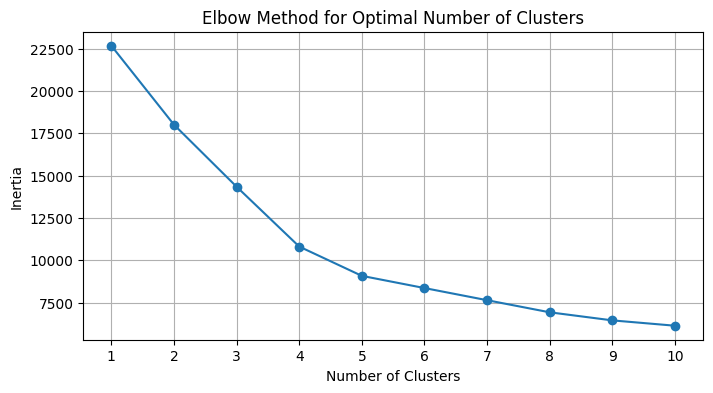

In [27]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the Elbow method
inertia = []
# Try a range of cluster numbers, for example from 1 to 10
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow method graph
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

## Visualize the Clusters

### Subtask:
Visualize the clusters using a scatter plot.

**Reasoning**:
Visualize the clusters using a scatter plot to understand the groupings.

## Apply K-Means Clustering

### Subtask:
Train the K-Means model with the chosen number of clusters (4) and assign cluster labels to each data point.

**Reasoning**:
Apply K-Means clustering with 4 clusters to the scaled data and get the cluster assignments.

In [30]:
# Apply K-Means clustering with the chosen number of clusters (e.g., 4)
optimal_n_clusters = 4  # Based on the Elbow method plot

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

# Display the first few rows with the new cluster labels
display(df.head())

# Display the distribution of data points across clusters
print("\nDistribution of data points across clusters:")
display(df['Cluster'].value_counts())

,Room,Month,Day,Hour,MorningFlag,AfternoonFlag,EveningFlag,NightFlag,Consumption_kWh,AverageConsumption_kWh,Cluster
0,1,1,1,0,0,0,0,1,0.051,0.286417,1
1,1,1,1,1,0,0,0,1,0.184,0.286417,1
2,1,1,1,2,0,0,0,1,0.212,0.286417,1
3,1,1,1,3,0,0,0,1,0.215,0.286417,1
4,1,1,1,4,0,0,0,1,0.180,0.286417,1



Distribution of data points across clusters:


,count
Cluster,
1,630
0,630
3,630
2,630


## Visualize the Clusters

### Subtask:
Visualize the clusters using a scatter plot.

**Reasoning**:
Visualize the clusters using a scatter plot to understand the groupings.

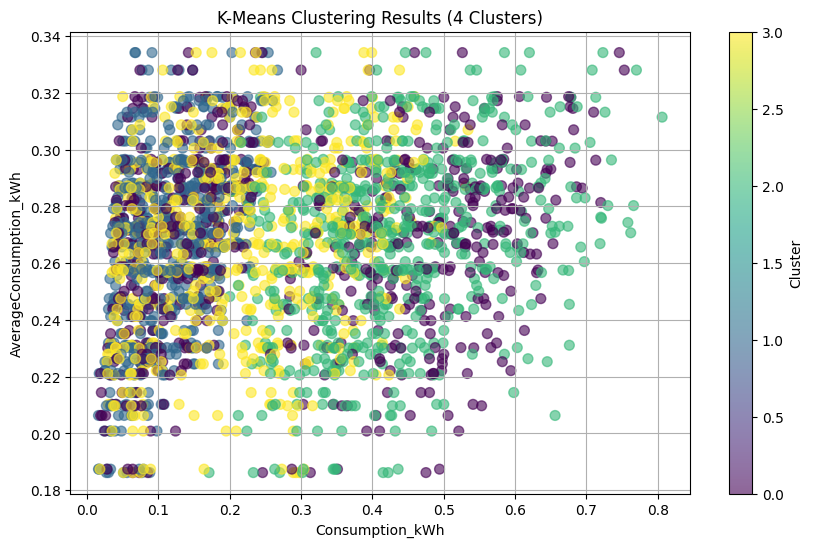

In [31]:
# Visualize the clusters using a scatter plot of two features
# Choose two features that you think might be interesting for visualization
# Replace 'Feature1' and 'Feature2' with actual column names from your DataFrame
feature1 = 'Consumption_kWh'
feature2 = 'AverageConsumption_kWh'

plt.figure(figsize=(10, 6))
plt.scatter(df[feature1], df[feature2], c=df['Cluster'], cmap='viridis', marker='o', s=50, alpha=0.6)
plt.title(f'K-Means Clustering Results ({optimal_n_clusters} Clusters)')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

## Analyze Cluster Characteristics

### Subtask:
Calculate and display the summary statistics for each cluster to understand their distinct characteristics.

**Reasoning**:
Group the original dataframe by cluster and display the descriptive statistics for each cluster to understand their characteristics.

In [32]:
# Analyze the characteristics of each cluster
cluster_characteristics = df.groupby('Cluster').agg({
    'Room': 'mean',
    'Month': 'mean',
    'Day': 'mean',
    'Hour': 'mean',
    'MorningFlag': 'mean',
    'AfternoonFlag': 'mean',
    'EveningFlag': 'mean',
    'NightFlag': 'mean',
    'Consumption_kWh': 'mean',
    'AverageConsumption_kWh': 'mean'
})

# Display the cluster characteristics
print("Cluster Characteristics (Mean values):")
display(cluster_characteristics)

# You can also display other statistics like median or standard deviation
# cluster_characteristics_median = df.groupby('Cluster').median()
# print("\nCluster Characteristics (Median values):")
# display(cluster_characteristics_median)

Cluster Characteristics (Mean values):


,Room,Month,Day,Hour,MorningFlag,AfternoonFlag,EveningFlag,NightFlag,Consumption_kWh,AverageConsumption_kWh
Cluster,,,,,,,,,,
0,8.0,1.0,4.0,8.5,1.0,0.0,0.000000,0.000000,0.299251,0.266898
1,8.0,1.0,4.0,2.5,0.0,0.0,0.000000,1.000000,0.118240,0.266898
2,8.0,1.0,4.0,20.5,0.0,0.0,0.666667,0.333333,0.431037,0.266898
3,8.0,1.0,4.0,14.5,0.0,1.0,0.000000,0.000000,0.219065,0.266898


## Visualize Cluster Characteristics

### Subtask:
Visualize the mean values of key features for each cluster using bar plots from the `cluster_characteristics` DataFrame.

**Reasoning**:
Create bar plots from the `cluster_characteristics` DataFrame to visualize the differences in mean feature values across the clusters.

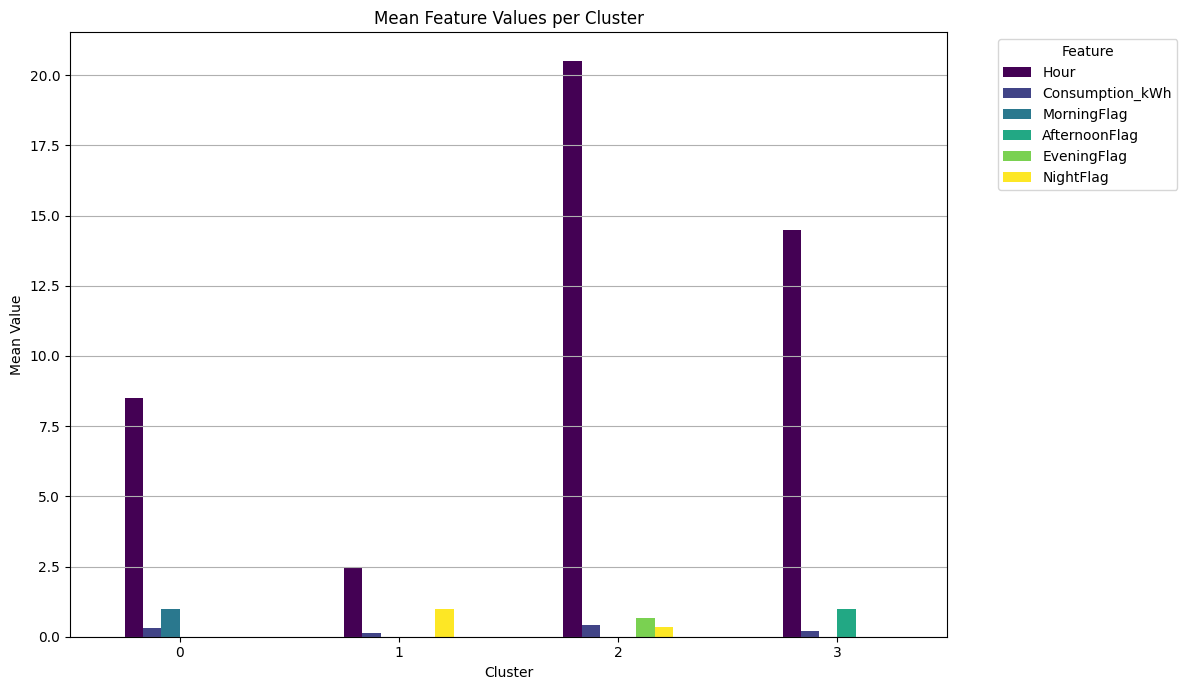

In [33]:
# Select some key features to visualize from the cluster_characteristics DataFrame
features_to_plot = ['Hour', 'Consumption_kWh', 'MorningFlag', 'AfternoonFlag', 'EveningFlag', 'NightFlag']

# Create bar plots for each selected feature
cluster_characteristics[features_to_plot].plot(kind='bar', figsize=(12, 7), colormap='viridis')
plt.title('Mean Feature Values per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()